In [14]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection

In [15]:
#import dataset
df = pd.read_csv("Data_Set.csv", low_memory=False)
new_df = df.loc[:, ['From Date','CO','NO2','Ozone', 'PM10', 'PM2.5','SO2']]

In [16]:
#making date as index
new_df['From Date'] = pd.to_datetime(new_df['From Date'])
new_df.set_index('From Date', inplace=True)
new_df.index = new_df.index.normalize()

In [17]:
#Drop rows with none values and update it in new dataset
new_df = new_df.dropna()
new_df.to_csv('Aqi_dataset.csv')
#new_clt_climate_df.tail()

In [18]:
#add dummy variable and AQI column and update it in new dataset
maxaqi=new_df.max(axis=1)
new_df.insert(6,'AQI',maxaqi)
new_df.insert(0,'Dummy',1)
new_df.to_csv('Aqi_dataset.csv')
#new_clt_climate_df.tail()

In [19]:
#define features and predictions
y=new_df.AQI
x=new_df.drop('AQI',axis=1)
x.shape

(1539, 7)

In [20]:
#divide data into train and test
#splits in 80:20 ratio sequencially
index = int(0.8 * len(x))
x_train, x_test = x[:index], x[index:]
y_train, y_test = y[:index], y[index:]
print(index)
type(x_train)

1231


pandas.core.frame.DataFrame

In [21]:
#making array of x,y for graph
Cols = pd.read_csv('Aqi_dataset.csv',usecols = ['From Date','AQI'])
Datecol = Cols['From Date'].values
AQIcol = Cols['AQI'].values
Datecol

array(['2015-03-04', '2015-04-04', '2015-08-04', ..., '2020-03-31',
       '2020-01-04', '2020-08-04'], dtype=object)

DECISION TREE REGRESSION

In [22]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor_dt = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor_dt.fit(x_train, y_train) 

y_pred_dt = regressor_dt.predict(x_test) 
  
# print the predicted price 
#print( y_pred_dt)
print(y_pred_dt.shape)
import sklearn.metrics as metrics
mae_dt = metrics.mean_absolute_error(y_test, y_pred_dt)
mse_dt = metrics.mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt) # or mse**(0.5)  
print("MAE:",mae_dt)
print("RMSE:", rmse_dt)

(308,)
MAE: 1.6321753246753232
RMSE: 6.734582223662632


RANDOM FOREST REGRESSION

In [23]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
regressor_rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
regressor_rf.fit(x_train, y_train)

y_pred_rf = regressor_rf.predict(x_test) 
  
# print the predicted price 
#print( y_pred_rf)
print(y_pred_rf.shape)

mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf) # or mse**(0.5)  
print("MAE:",mae_rf)
print("RMSE:", rmse_rf)

(308,)
MAE: 0.6876460389611734
RMSE: 1.9462451571427395


GRADIENT BOOSTING REGRESSION

In [24]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
# Fit regression model
params = {'n_estimators': 200, 'learning_rate': 0.02}
regressor_gb = ensemble.GradientBoostingRegressor(**params)

regressor_gb.fit(x_train, y_train)
y_pred_gb=regressor_gb.predict(x_test)

print(y_pred_gb.shape)

mae_gb = metrics.mean_absolute_error(y_test, y_pred_gb)
mse_gb = metrics.mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb) # or mse**(0.5)  
print("MAE:",mae_gb)
print("RMSE:", rmse_gb)



(308,)
MAE: 3.1193846913375394
RMSE: 5.284745630184157


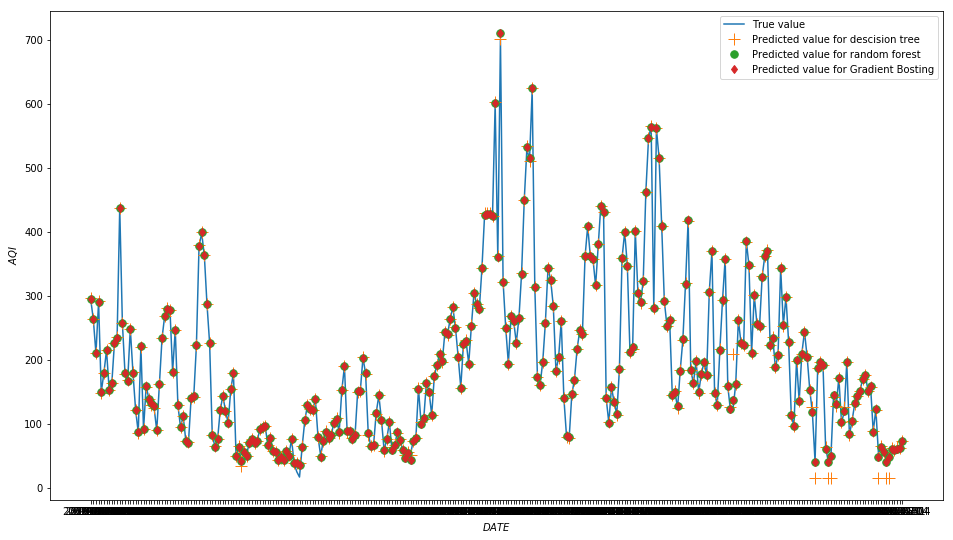

In [31]:
plt.figure(figsize=(16,9))

#actual graph
plt.plot(Datecol[index:],y_test)
plt.plot(Datecol[index:],y_pred_dt,'+', markersize=12)
plt.plot(Datecol[index:],y_pred_rf,'o', markersize=7.5)
plt.plot(Datecol[index:],y_pred_rf,'d' )



plt.xlabel("$DATE$")
plt.ylabel("$AQI$");
plt.legend(["True value","Predicted value for descision tree", "Predicted value for random forest", "Predicted value for Gradient Bosting"]);


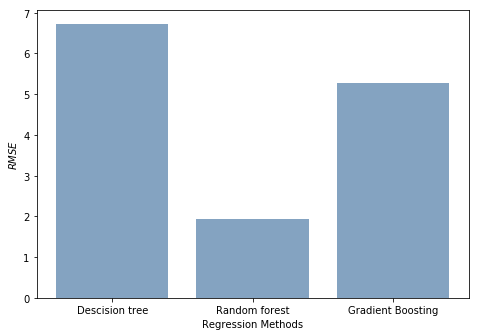

In [34]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#plt.xticks(rotation=90)
langs = ['Descision tree', 'Random forest', 'Gradient Boosting']
RMSE = [rmse_dt,rmse_rf,rmse_gb]
plt.xlabel("Regression Methods")
plt.ylabel("$RMSE$");
ax.bar(langs,RMSE,color=(0.2, 0.4, 0.6,0.6))
plt.show()